In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_BppAoe0.zip

--2020-04-26 17:21:01--  https://datahack-prod.s3.amazonaws.com/test_file/test_BppAoe0.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.40
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2444751 (2.3M) [application/zip]
Saving to: ‘test_BppAoe0.zip’

test_BppAoe0.zip    100%[===================>]   2.33M  1.41MB/s    in 1.7s    

2020-04-26 17:21:04 (1.41 MB/s) - ‘test_BppAoe0.zip’ saved [2444751/2444751]



In [2]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_E52nqFa.zip

--2020-04-26 17:21:05--  https://datahack-prod.s3.amazonaws.com/train_file/train_E52nqFa.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.112
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5195555 (5.0M) [application/zip]
Saving to: ‘train_E52nqFa.zip’

train_E52nqFa.zip   100%[===================>]   4.95M  2.64MB/s    in 1.9s    

2020-04-26 17:21:08 (2.64 MB/s) - ‘train_E52nqFa.zip’ saved [5195555/5195555]



In [3]:
!unzip test_BppAoe0.zip

Archive:  test_BppAoe0.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


In [4]:
!unzip train_E52nqFa.zip

Archive:  train_E52nqFa.zip
  inflating: game_overview.csv       
  inflating: __MACOSX/._game_overview.csv  
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
game = pd.read_csv('game_overview.csv')

In [7]:
train.head(5)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [8]:
test.head(5)

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [9]:
game.head(5)

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [10]:
game.shape,train.shape,test.shape

((64, 5), (17494, 5), (8045, 4))

In [0]:
import re
go_tags=game.copy()
def clean_tag(tag):
    tag = re.sub(r"[\'\[\]]","",tag)
    tag = re.sub(r'\s','',tag)
    tag = re.sub(r'\"','',tag)
    return tag
go_tags['tags']=go_tags['tags'].apply(lambda x: clean_tag(x))

temp=go_tags['tags'].str.split(',')

go_tags=go_tags.reindex(go_tags.index.repeat(temp.apply(len)))
go_tags['tags_new'] = np.hstack(temp)
go_tags=go_tags[['title','tags_new']]
go_tags=pd.crosstab(go_tags.title,go_tags.tags_new)
go_tags.head()

tags_new,2D,2DFighter,3DVision,4PlayerLocal,Action,Action-Adventure,ActionRPG,Adventure,America,Anime,Arcade,Atmospheric,BaseBuilding,BasedOnANovel,Basketball,BattleRoyale,Beatemup,Blood,BoardGame,Building,BulletHell,Capitalism,CardGame,Cartoon,Cartoony,Casual,CharacterCustomization,CityBuilder,Class-Based,Classic,Clicker,Co-op,Comedy,ComicBook,Competitive,Controller,Crafting,CultClassic,Cute,Dark,...,Sci-fi,SexualContent,Shooter,SideScroller,Simulation,Singleplayer,Space,SpaceSim,Sports,Stealth,StoryRich,Strategy,StrategyRPG,Superhero,Survival,SurvivalHorror,Tactical,TacticalRPG,Tanks,Team-Based,Third-PersonShooter,ThirdPerson,Top-Down,TowerDefense,TrackIR,Trading,TradingCardGame,Turn-Based,Turn-BasedStrategy,Turn-BasedTactics,VR,Violent,VisualNovel,Voxel,WalkingSimulator,War,WorldWarI,WorldWarII,Zombies,e-sports
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AdventureQuest 3D,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aura Kingdom,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Black Squad,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
Bless Online,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Bloons TD Battles,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
game=game.merge(go_tags, on='title', how='left')

In [0]:
del game['tags']

In [0]:
train=train.merge(game, on='title', how='left')

In [0]:
test=test.merge(game, on='title', how='left')

In [0]:
train['year']=train['year'].fillna(method ='bfill') 
test['year']=test['year'].fillna(method ='bfill') 

In [0]:
train['year']=train['year'].fillna(method ='ffill') 
test['year']=test['year'].fillna(method ='ffill') 

In [0]:
loc = np.append(train['title'].values, test['title'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['title']=l.transform(train['title'])
test['title']=l.transform(test['title'])

In [0]:
loc = np.append(train['publisher'].values, test['publisher'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['publisher']=l.transform(train['publisher'])
test['publisher']=l.transform(test['publisher'])

In [0]:
loc = np.append(train['developer'].values, test['developer'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['developer']=l.transform(train['developer'])
test['developer']=l.transform(test['developer'])

In [0]:
loc = np.append(train['overview'].values, test['overview'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['overview']=l.transform(train['overview'])
test['overview']=l.transform(test['overview'])

In [0]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

train['user_review'] = train['user_review'].apply(clean_text)
test['user_review'] = test['user_review'].apply(clean_text)

In [0]:
del train['tags']
del test['tags']

In [0]:
reviews_df=train

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["user_review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


In [0]:

# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["user_review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [0]:
del reviews_df['user_review']

In [0]:
train=reviews_df

In [0]:
reviews_df=test

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["user_review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


In [0]:

# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["user_review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [0]:
test=reviews_df

In [0]:
del test['user_review']

In [0]:
train_df=train
test_df=test

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
X = train_df.drop(labels=['user_suggestion'], axis=1)
y = train_df['user_suggestion'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:

X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((13120, 171), (13120,), (4374, 171), (4374,))

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.5, n_estimators=100, random_state=42, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.2011           0.0415            3.18s
         2           0.1795           0.0228            3.33s
         3           0.1647           0.0143            3.12s
         4           0.1581           0.0075            3.06s
         5           0.1536           0.0028            3.02s
         6           0.1481           0.0036            2.96s
         7           0.1439           0.0023            2.93s
         8           0.1425           0.0007            2.87s
         9           0.1427           0.0007            2.82s
        10           0.1397           0.0006            2.77s
        20           0.1300          -0.0003            2.40s
        30           0.1228          -0.0007            2.10s
        40           0.1198          -0.0002            1.81s
        50           0.1139          -0.0009            1.50s
        60           0.1122          -0.0007            1.20s
       

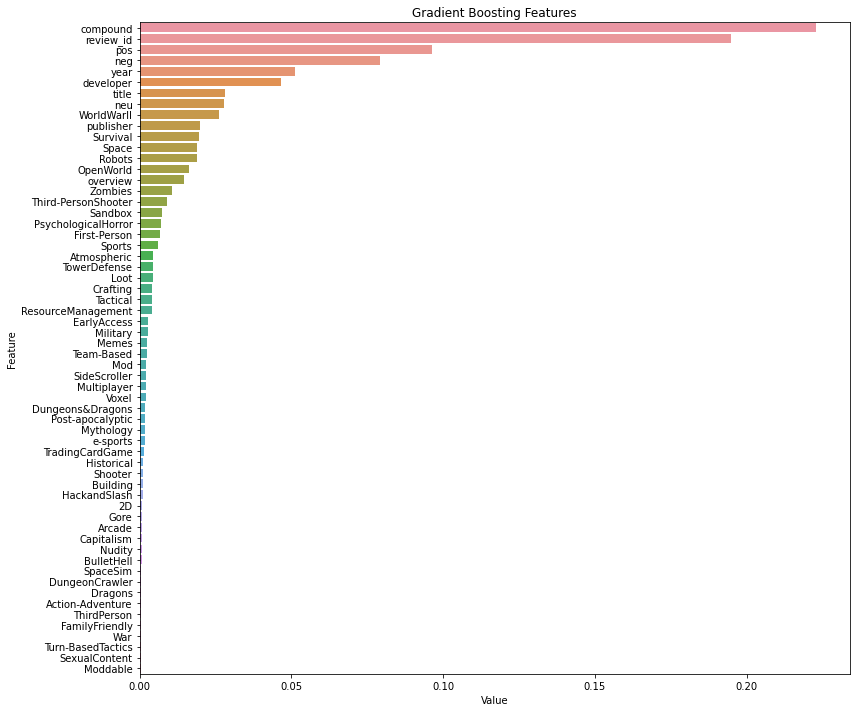

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test_df

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=2, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100, random_state=101, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

RMSE 0.37211792533870486
RMSE 0.37093831469043925


In [0]:
np.mean(errgb)

0.371528120014572

In [0]:

final = np.mean(y_pred_totgb,0).round().astype(int)
final

array([1, 0, 0, ..., 0, 0, 0])

In [0]:
submission = pd.DataFrame({
        "review_id": test['review_id'],
        "user_suggestion": final
    })
submission.to_csv('./He_air.csv', index=False)
print(submission)

      review_id  user_suggestion
0          1603                1
1          1604                0
2          1605                0
3          1606                1
4          1607                1
...         ...              ...
8040      25198                0
8041      25199                0
8042      25200                0
8043      25201                0
8044      25202                0

[8045 rows x 2 columns]


#2nd Method

In [13]:

import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
train['text']=train['user_review']+' '+ train['title']+' '+train['developer']+' '+train['publisher']+' '+train['tags']+' '+train['overview']

In [0]:
test['text']=test['user_review']+' '+ test['title']+' '+test['developer']+' '+test['publisher']+' '+test['tags']+' '+test['overview']

In [0]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

In [0]:

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(train['text'], train['text'], test_size=0.1, stratify=train['user_suggestion'], 
                                                random_state=1)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, 
                             min_df=3, max_features=None, binary=False, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

In [0]:
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_cv_tfidf = tfidf_vect.transform(X_cv)

In [29]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=200, random_state=0, class_weight='balanced')
ovr = OneVsRestClassifier(sgd)
ovr.fit(X_train_tfidf, y_train)
y_pred_class = ovr.predict(X_cv_tfidf)
print('f1_score       :', f1_score(y_cv, y_pred_class, average='macro'))
print('accuracy score :', accuracy_score(y_cv, y_pred_class))

KeyboardInterrupt: ignored

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, 
                             min_df=3, max_features=None, binary=False, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

In [0]:

full_text = list(train['text'].values) + list(test['text'].values)
tfidf_vect.fit(full_text)

X_train_tfidf = tfidf_vect.transform(train['text'])
X_test_tfidf = tfidf_vect.transform(test['text'])

y_train = train['user_suggestion']

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=200, random_state=0, class_weight='balanced')
ovr = OneVsRestClassifier(sgd)
ovr.fit(X_train_tfidf, y_train)
y_pred_class = ovr.predict(X_test_tfidf)
y_pred_class

array([1, 0, 0, ..., 0, 1, 1])

In [0]:
test['user_suggestion'] = y_pred_class
test.drop(['title','year','user_review'], axis=1,inplace=True)
test.head()

,review_id,user_suggestion
0,1603,1
1,1604,0
2,1605,0
3,1606,0
4,1607,1


In [0]:
test['user_suggestion'].value_counts()

1    4350
0    3695
Name: user_suggestion, dtype: int64

In [0]:

test.to_csv('submission.csv', index=False)

In [0]:
from google.colab import files
files.download('submission.csv')